In [2]:
#We only need Pandas and Seaborn for this simple model
import pandas as pd
import seaborn as sns

In [4]:
#Load dataset
#A built-in dataset from Seaborn! No need to download data
penguins = sns.load_dataset("penguins")
print("Penguins succesfully loaded!")

Penguins succesfully loaded!


In [5]:
print("Data displayed below")
penguins.head(5)

Data displayed below


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### Let's focus on species: Adelie and Gentoo only, so we can practice Data Cleaning

In [6]:
penguins_sub = penguins[penguins['species'] != "Chinstrap"] #Removes all Chistrap species
penguins_final = penguins_sub.dropna() # removes any rows with missing values
penguins_final.reset_index(inplace=True, drop=True)

### Exploratory Data Analysis

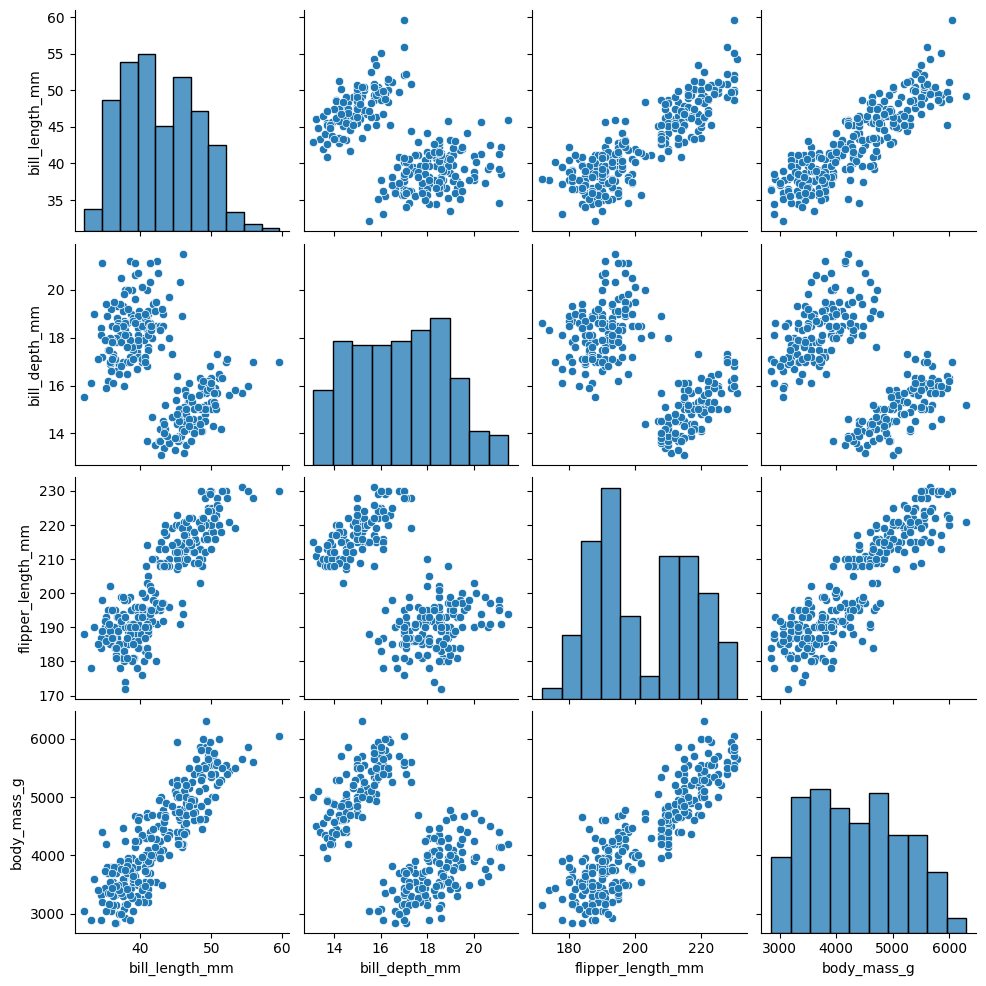

In [9]:
# Create pairwise scatterplots of data set
sns.pairplot(penguins_final)

### Since there's positive correlations represented by lines from some of the plots, we will use Linear Regression

## Model Construction

In [21]:
# Subset Data
ols_data = penguins_final[["body_mass_g", "bill_length_mm"]]

In [22]:
# Write out formula
ols_formula = "body_mass_g ~ bill_length_mm"    #Write as a string so we can parse it later, maybe?

In [23]:
from statsmodels.formula.api import ols

In [24]:
# Build OLS, and fit model to data
OLS = ols(formula = ols_formula, data = ols_data)
model = OLS.fit()

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     874.3
Date:                Fri, 28 Nov 2025   Prob (F-statistic):           1.33e-85
Time:                        14:12:34   Log-Likelihood:                -1965.8
No. Observations:                 265   AIC:                             3936.
Df Residuals:                     263   BIC:                             3943.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1707.2919    205.640     -8.302      0.000   -2112.202   -1302.382
bill_length_mm   141.1904      4.775     29.569      0.000     131.788     150.592
==============================================================================
Omnibus:                        2.060   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.357   Jarque-Bera (JB):                2.103
Skew:                           0.210   Prob(JB):                        0.349
Kurtosis:                       2.882   Cond. No.                         357.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='bill_length_mm', ylabel='body_mass_g'>

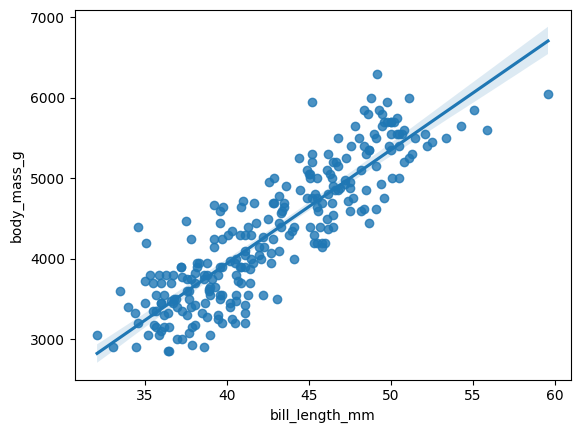

In [25]:
sns.regplot(x = "bill_length_mm", y = "body_mass_g", data = ols_data)

In [26]:
# Subset X variable
X = ols_data["bill_length_mm"]

# Get predictions from model
fitted_values = model.predict(X)

In [27]:
residuals = model.resid

#### Check normality assumption

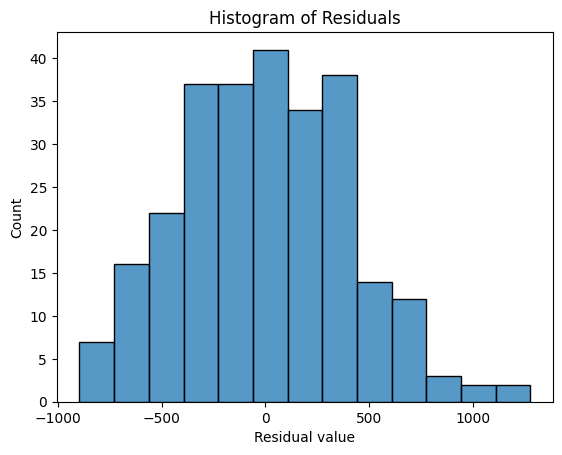

In [32]:
import matplotlib.pyplot as plt
fig = sns.histplot(residuals)
fig.set_xlabel("Residual value")
fig.set_title("Histogram of Residuals")
plt.show()

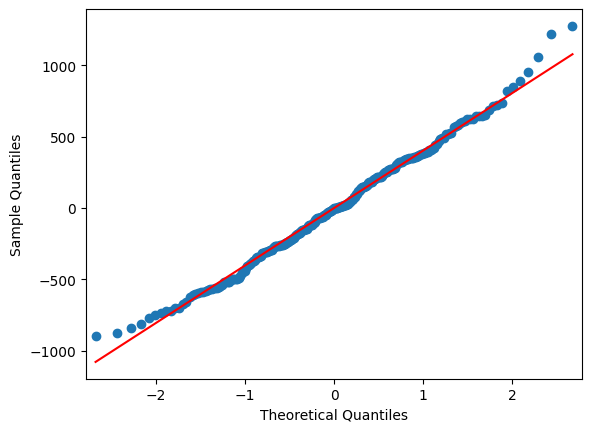

In [33]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
fig = sm.qqplot(model.resid, line = 's')

### Check Homoscedasticity assumption

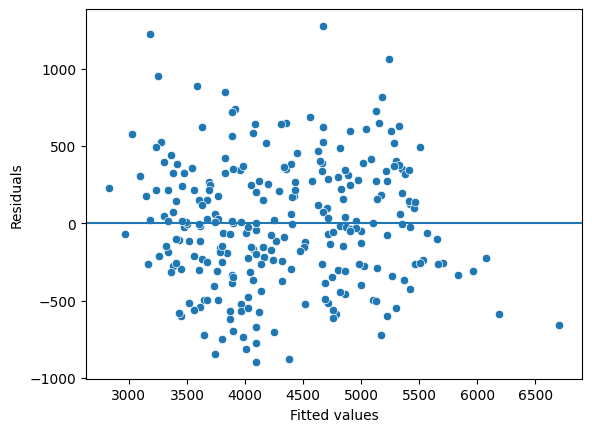

In [40]:
import matplotlib.pyplot as plt
fig = sns.scatterplot(x=fitted_values, y=residuals)

fig.axhline(0)

#labels
fig.set_xlabel("Fitted values")
fig.set_ylabel("Residuals")
plt.show()